In [21]:
import pandas as pd

# load in data from excel
health_data = pd.read_excel("C:\\Users\\91961\\Downloads\\Health_dataset.csv.xlsx")
print(health_data)


     Patient ID  Gender        Disease            Treatment  \
0     PAT-00001    Male   Tuberculosis             Dialysis   
1     PAT-00002  Female        Malaria             Dialysis   
2     PAT-00003  Female        Malaria              Surgery   
3     PAT-00004    Male         Asthma             Dialysis   
4     PAT-00005  Female       Diabetes     Physical Therapy   
...         ...     ...            ...                  ...   
7995  PAT-07996    Male       HIV/AIDS         Radiotherapy   
7996  PAT-07997  Female  Heart Disease         Chemotherapy   
7997  PAT-07998    Male         Asthma             Dialysis   
7998  PAT-07999    Male        Typhoid  Ventilation Support   
7999  PAT-08000    Male   Tuberculosis           Medication   

                   Hospital Admission Date Discharge Date Treatment Status  \
0     City General Hospital     2022-12-19     2023-01-16        Recovered   
1     City General Hospital     2023-03-29     2023-04-21        Recovered   
2     Cit

In [22]:
#Display the first few rows
print(health_data.head())

  Patient ID  Gender       Disease         Treatment               Hospital  \
0  PAT-00001    Male  Tuberculosis          Dialysis  City General Hospital   
1  PAT-00002  Female       Malaria          Dialysis  City General Hospital   
2  PAT-00003  Female       Malaria           Surgery  City General Hospital   
3  PAT-00004    Male        Asthma          Dialysis  City General Hospital   
4  PAT-00005  Female      Diabetes  Physical Therapy  City General Hospital   

  Admission Date Discharge Date Treatment Status Cause of Death Date of Birth  
0     2022-12-19     2023-01-16        Recovered            NaN    1973-06-05  
1     2023-03-29     2023-04-21        Recovered            NaN    1998-11-21  
2     2022-09-16     2022-10-15        Recovered            NaN    1942-02-14  
3     2022-02-07     2022-02-11        Recovered            NaN    1943-01-17  
4     2022-10-25     2022-10-30        Recovered            NaN    1979-07-28  


In [23]:
# Display the last few rows
print(health_data.tail(5))

     Patient ID  Gender        Disease            Treatment        Hospital  \
7995  PAT-07996    Male       HIV/AIDS         Radiotherapy  Sunrise Clinic   
7996  PAT-07997  Female  Heart Disease         Chemotherapy  Sunrise Clinic   
7997  PAT-07998    Male         Asthma             Dialysis  Sunrise Clinic   
7998  PAT-07999    Male        Typhoid  Ventilation Support  Sunrise Clinic   
7999  PAT-08000    Male   Tuberculosis           Medication  Sunrise Clinic   

     Admission Date Discharge Date Treatment Status Cause of Death  \
7995     2022-06-28     2022-07-05        Recovered            NaN   
7996     2022-01-28     2022-02-25        Recovered            NaN   
7997     2022-09-14     2022-09-22        Recovered            NaN   
7998     2023-08-04     2023-08-25        Recovered            NaN   
7999     2023-09-09     2023-10-06        Recovered            NaN   

     Date of Birth  
7995    1925-11-10  
7996    2004-06-15  
7997    1993-10-03  
7998    1999-02-01  

# 1. What is the total number of patients?

In [24]:
# Count the numbers of patients
total_records = health_data.shape[0]


# 1. What is the total number of patients?
print("Total Patients",total_records)

Total Patients 8000


 # 2. How is the patient population distributed by gender?

In [25]:
# 2. How is the patient population distributed by gender?
gender_count = health_data['Gender'].value_counts()
print("Gender Distribution:")
print(gender_count)


Gender Distribution:
Gender
Male      5206
Female    2794
Name: count, dtype: int64


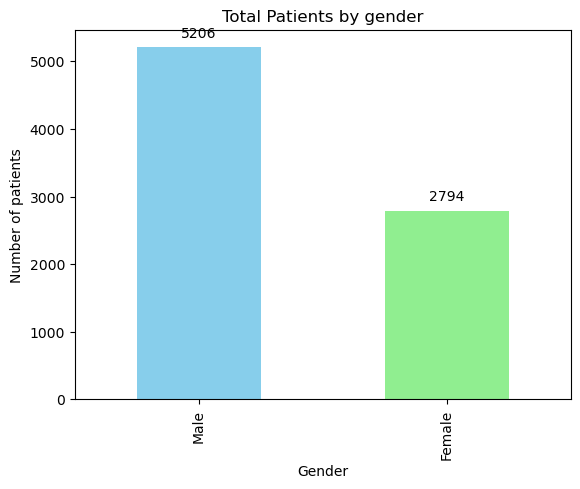

In [26]:
# Visualize gender distribution: 
# Adding Data lable 
import matplotlib.pyplot as plt
ax= gender_count.plot(kind='bar', color=['skyblue', 'lightgreen'])

plt.title("Total Patients by gender")
plt.ylabel("Number of patients")

# Lable part:
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(
        int(height),
        xy=(bar.get_x() + bar.get_width()/2, height),
        xytext = (0,5),
        textcoords = "offset points", 
        ha='center',
        va='bottom'
    )

plt.show()

# 3. Patient's Age-group by total visit

Age Group
21-40     1646
41-60     1608
81-100    1603
61-80     1580
0-20      1533
Name: count, dtype: int64


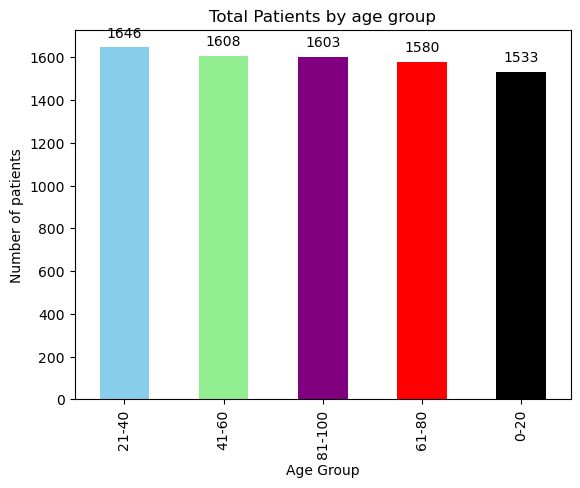

In [27]:
# 3. Patient's Age-group by total visit

# Convert the Admission date and Date of Birth to proper date format
health_data['Admission Date'] = pd.to_datetime(health_data["Admission Date"])
health_data['Date of Birth'] = pd.to_datetime(health_data['Date of Birth'])

# Calculate the patients age as of the time of Admission in year
health_data['Age'] = (health_data['Admission Date'] - health_data['Date of Birth']).dt.days / 365.25
health_data['Age'] = health_data['Age'].astype(int)

# Dinfine age bins
bins = [0,20,40,60,80,100]
labels = ['0-20', '21-40', '41-60', '61-80', '81-100']

# Create an age group using the bins var diffined
health_data['Age Group'] = pd.cut(health_data['Age'], bins=bins, labels=labels, right=False)

# Count the number of patients in each age group
age_count = health_data['Age Group'].value_counts()

# Visualize the age group
ax = age_count.plot(kind='bar', color=['skyblue', 'lightgreen', 'purple', 'red', 'black'])
print(age_count)

plt.title("Total Patients by age group")
plt.ylabel("Number of patients")

# Lable part:
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(
        int(height),
        xy=(bar.get_x() + bar.get_width()/2, height),
        xytext = (0,5),
        textcoords = "offset points", 
        ha='center',
        va='bottom'
    )

plt.show()

# 4. Which diseases are most commonly diagnosed among the patients?

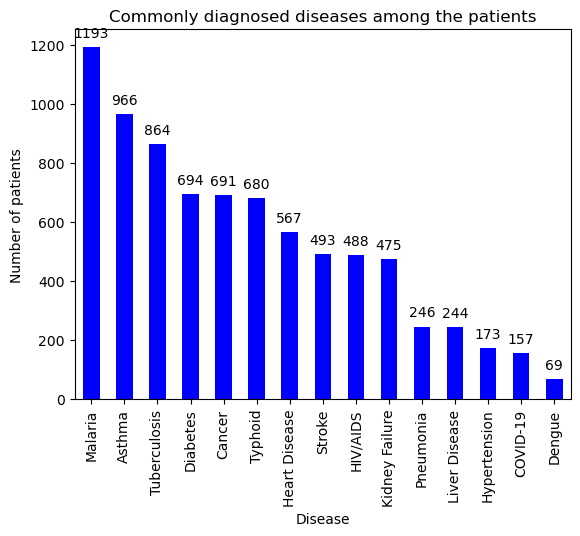

In [28]:
# 4. Which diseases are most commonly diagnosed among the patients?
disease_counts = health_data['Disease'].value_counts()
ax = disease_counts.plot(kind='bar', color='blue')


plt.title("Commonly diagnosed diseases among the patients")
plt.ylabel("Number of patients")

# Label part:
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(
        int(height),
        xy=(bar.get_x() + bar.get_width()/2, height),
        xytext = (0,5),
        textcoords = "offset points",
        ha='center',
        va='bottom'
    )

plt.show()

In [29]:
# Get the top 3 diseases
disease_count = health_data['Disease'].value_counts().nlargest(3)
print(disease_count)

Disease
Malaria         1193
Asthma           966
Tuberculosis     864
Name: count, dtype: int64


In [30]:
# Get the cpunt of top 3 diseases
disease_count = health_data['Disease'].value_counts().nlargest(3)
total_top3 = disease_count.sum()
format_value = "{:,}".format(total_top3)
print("Total count of the 3 most common diseases:", format_value)

Total count of the 3 most common diseases: 3,023


In [31]:
# Get the count of top diseases

dynamictop = 5
disease_count = health_data['Disease'].value_counts().nlargest(dynamictop)
total_top3 = disease_count.sum()
format_value = "{:,}".format(total_top3)
description =f"Total count of the {dynamictop} most common disease:"
print(description, format_value)

Total count of the 5 most common disease: 4,408


In [32]:
disease_counttop3 = health_data['Disease'].value_counts().nlargest(3)
total_diseases_count = health_data['Disease'].value_counts().sum()


# Calculate the top 3 percentage
percentage = (disease_counttop3/total_diseases_count) * 100
print(percentage)

Disease
Malaria         14.9125
Asthma          12.0750
Tuberculosis    10.8000
Name: count, dtype: float64


In [33]:
disease_counttop3 = health_data['Disease'].value_counts().nlargest(3)
total_diseases_count = health_data['Disease'].value_counts().sum()

# Calculate the top 3 percentage
percentage = (disease_counttop3/total_diseases_count) * 100
roundpercentage = percentage.round(0).astype(int)
print(roundpercentage)

Disease
Malaria         15
Asthma          12
Tuberculosis    11
Name: count, dtype: int64


In [34]:
disease_counttop3 = health_data['Disease'].value_counts().nlargest(3)
total_diseases_count = health_data['Disease'].value_counts().sum()

# Calculate the top 3 percentage
percentage = (disease_counttop3/total_diseases_count) * 100
roundpercentage = percentage.round(0).astype(int)

for disease, pct in roundpercentage.items():
    print(f"{disease}: {pct}%")
 

Malaria: 15%
Asthma: 12%
Tuberculosis: 11%


In [35]:
disease_counttop3 = health_data['Disease'].value_counts().nlargest(3)
total_diseasestop3count = disease_counttop3.sum()

# Calculate the top 3 percentage

pcttop3 = (disease_counttop3/total_diseasestop3count)*100

roundpct = pcttop3.round(0).astype(int)

for disease, pct in roundpct.items():
    print(f"{disease}: {pct}%")




Malaria: 39%
Asthma: 32%
Tuberculosis: 29%


# 5. Are certain disease more prevalent in one gender compared to the other?

In [36]:
# 5. Are certain disease more prevalent in one gender compared to the other?
gender_disease = pd.crosstab(health_data['Disease'], health_data['Gender'])
print("Diseases that are common among genders")
print(gender_disease)

Diseases that are common among genders
Gender          Female  Male
Disease                     
Asthma             320   646
COVID-19            53   104
Cancer             239   452
Dengue              27    42
Diabetes           256   438
HIV/AIDS           155   333
Heart Disease      206   361
Hypertension        65   108
Kidney Failure     182   293
Liver Disease       73   171
Malaria            407   786
Pneumonia           93   153
Stroke             177   316
Tuberculosis       302   562
Typhoid            239   441


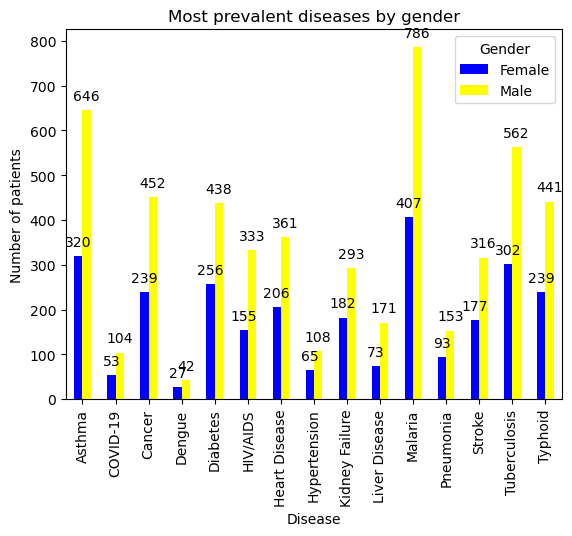

In [37]:
gender_disease = pd.crosstab(health_data['Disease'], health_data['Gender'])
ax = gender_disease.plot(kind='bar', color=['blue', 'yellow'])


plt.title("Most prevalent diseases by gender")
plt.ylabel("Number of patients")

# Label part:
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(
        int(height),
        xy=(bar.get_x() + bar.get_width()/2, height),
        xytext = (0,5),
        textcoords = "offset points",
        ha='center',
        va='bottom'
    )

plt.show()

# 6. For any records within recorded course of death, analyze pattern to identify risk factor

In [38]:
# 6. For any records within recorded course of death, analyze pattern to identify risk factor
#Filter records where the cause sof death is not empty
df = pd.read_excel(r"C:\Users\91961\Downloads\Health_dataset.csv.xlsx")
death_cause = df.dropna(subset='Cause of Death')

count_cause = death_cause['Cause of Death'].value_counts()

print("Most common cause of death")
print(count_cause)

Most common cause of death
Cause of Death
Multiple Organ Failure    114
Respiratory Failure       109
Cardiac Arrest            102
Septic Shock               94
Name: count, dtype: int64


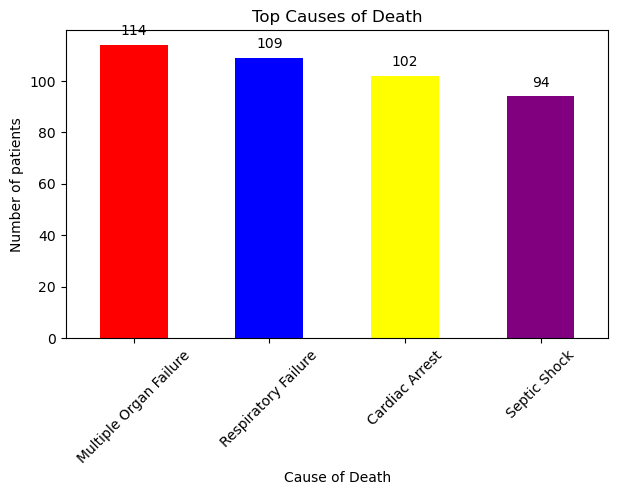

In [39]:
# Visualize the finding

plt.figure(figsize = (7,4))
ax = count_cause.plot(kind='bar', color=['red', 'blue', 'yellow', 'purple'])
plt.xticks(rotation=45)

plt.title("Top Causes of Death")

plt.ylabel("Number of patients")

# Label part:
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(
        int(height),
        xy=(bar.get_x() + bar.get_width()/2, height),
        xytext = (0,5),
        textcoords = "offset points",
        ha='center',
        va='bottom'
    )

plt.show()
          